In [1]:
import pandas as pd 
import sys
sys.path.append('../')
import models_utils
import matplotlib.pyplot as plt

In [2]:
municipals = []
with (open("../municipals.txt", "r") as f):
    for line in f:
        municipals.append(line.strip())
municipals

['Ajuy',
 'Alimodian',
 'Anilao',
 'Badiangan',
 'Balasan',
 'Banate',
 'Barotac Nuevo',
 'Barotac Viejo',
 'Batad',
 'Bingawan',
 'Cabatuan',
 'Calinog',
 'Carles',
 'Passi City',
 'Concepcion',
 'Dingle',
 'Duenas',
 'Dumangas',
 'Estancia',
 'Guimbal',
 'Igbaras',
 'Janiuay',
 'Lambunao',
 'Leganes',
 'Lemery',
 'Leon',
 'Maasin',
 'Miagao',
 'Mina',
 'New Lucena',
 'Oton',
 'Pavia',
 'Pototan',
 'San Dionisio',
 'San Enrique',
 'San Joaquin',
 'San Miguel',
 'San Rafael',
 'Santa Barbara',
 'Sara',
 'Tigbauan',
 'Tubungan',
 'Zarraga']

In [3]:
# Load the data and get the sum of the values for each date

for municipal in municipals:
    if municipal == "Ajuy":
        summed_df = pd.read_csv(f"../../data/Merged Data/{municipal}_merged.csv")
        summed_df = summed_df[["Year-Week", "Cases"]]
        continue
    municipal_df = pd.read_csv(f"../../data/Merged Data/{municipal}_merged.csv")
    municipal_df = municipal_df[["Year-Week", "Cases"]]
    summed_df = pd.concat([summed_df, municipal_df], axis=0)
    summed_df = summed_df.groupby("Year-Week").sum().reset_index()
summed_df

,Year-Week,Cases
0,2014-01-13,18.0
1,2014-01-20,26.0
2,2014-01-27,9.0
3,2014-02-03,8.0
4,2014-02-10,11.0
...,...,...
567,2024-12-02,104.0
568,2024-12-09,135.0
569,2024-12-16,113.0
570,2024-12-23,84.0


In [4]:
summed_df = summed_df.rename(columns={"Year-Week": "Date"})
summed_df["Date"] = pd.to_datetime(summed_df["Date"], format="%Y-%m-%d")

Text(0, 0.5, 'Cases')

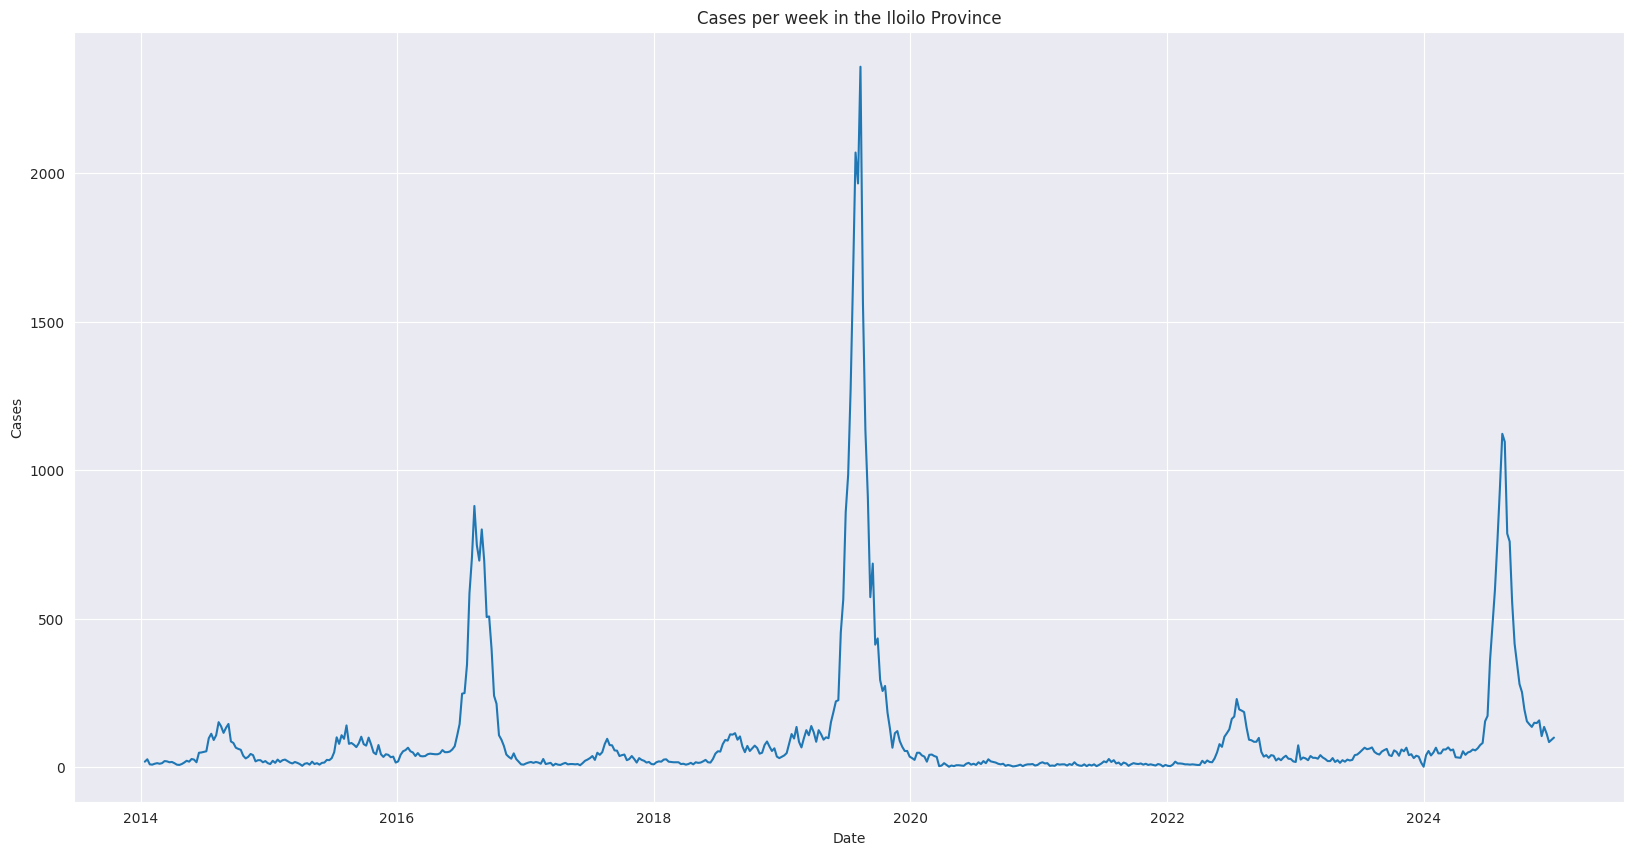

In [5]:
# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(summed_df["Date"], summed_df["Cases"], label="Cases")
plt.title("Cases per week in the Iloilo Province")
plt.xlabel("Date")
plt.ylabel("Cases")

In [6]:
# getting the summed dataframe predictions
#municipal model
sum_pred_mun_df = pd.DataFrame()
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        df = pd.read_csv(f'output/Municipal/CSV/{municipal}/predictions_{i}_week_ahead.csv')
        df['Week'] = i
        sum_pred_mun_df = pd.concat([sum_pred_mun_df, df])
#group by week then date then sum
sum_pred_mun_df = sum_pred_mun_df.groupby(['Week', 'Date']).sum().reset_index()
sum_pred_mun_df["Date"] = pd.to_datetime(sum_pred_mun_df["Date"], format="%Y-%m-%d")

In [7]:
sum_pred_pooled_df = pd.DataFrame()
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,12]:
        df = pd.read_csv(f'output/Provincial/CSV/{municipal}/predictions_{i}_week_ahead.csv')
        df['Week'] = i
        sum_pred_pooled_df = pd.concat([sum_pred_pooled_df, df])
#group by week then date then sum
sum_pred_pooled_df = sum_pred_pooled_df.groupby(['Week', 'Date']).sum().reset_index()
sum_pred_pooled_df["Date"] = pd.to_datetime(sum_pred_pooled_df["Date"], format="%Y-%m-%d")
        

FileNotFoundError: [Errno 2] No such file or directory: 'output/Provincial/CSV/Ajuy/predictions_1_week_ahead.csv'

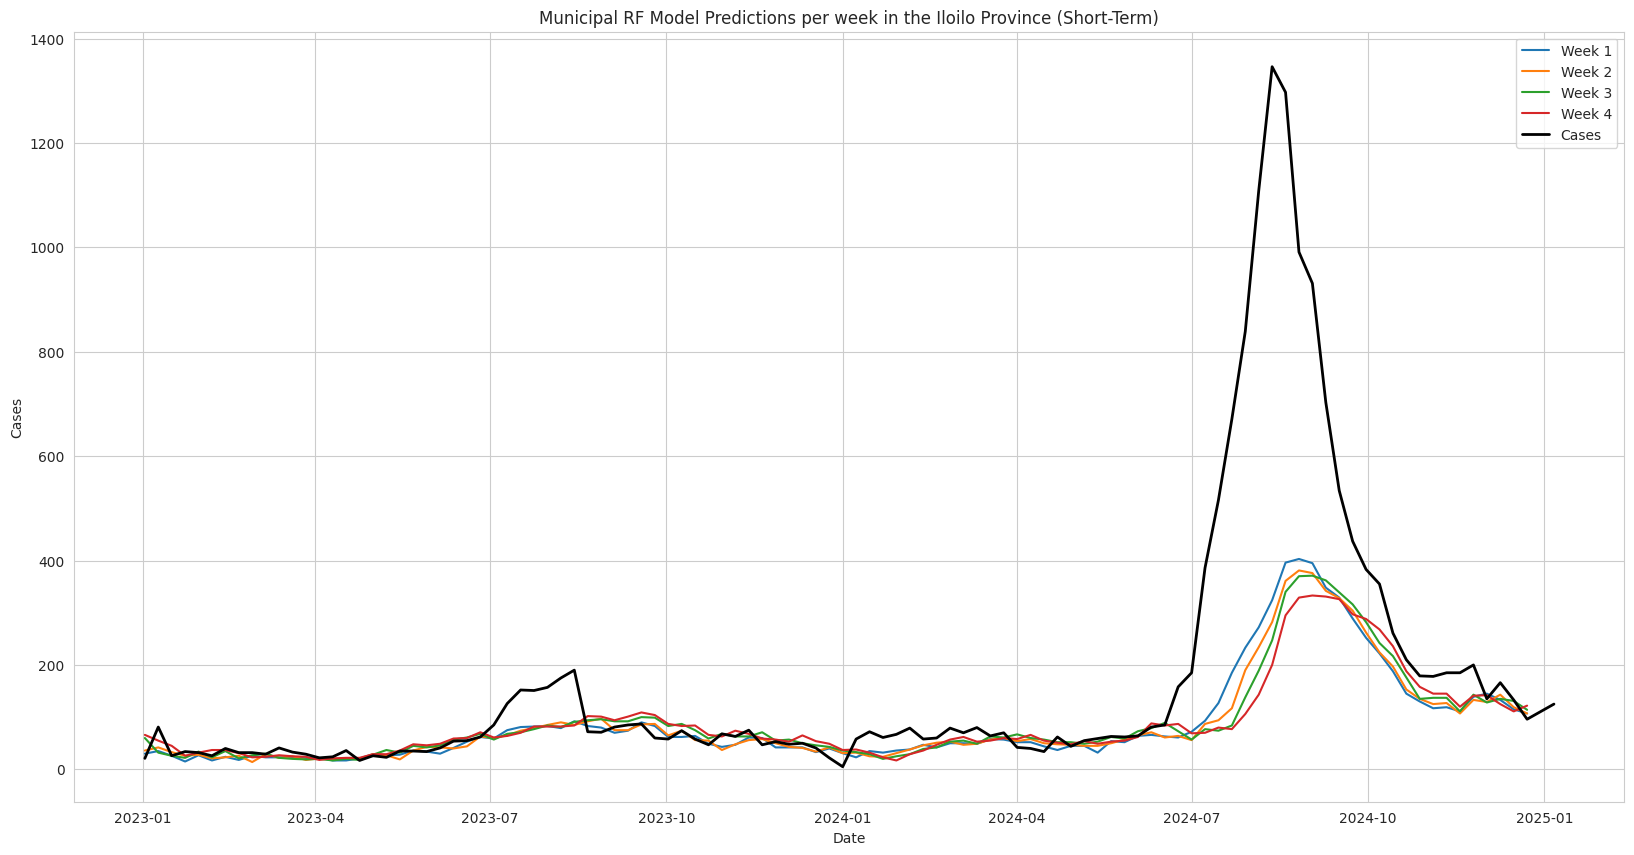

In [8]:
#plot the predictions for Municipal Model
plt.figure(figsize=(20, 10))
n_weeks = [1,2,3,4]
for i in n_weeks:
    plt.plot(sum_pred_mun_df[sum_pred_mun_df["Week"] == i]["Date"], sum_pred_mun_df[sum_pred_mun_df["Week"] == i]["predictions"], label=f"Week {i}")
#show actual
plt.plot(summed_df[summed_df["Date"].dt.year >= 2023]["Date"], summed_df[summed_df["Date"].dt.year >=2023]["Cases"], label="Cases", color = "black", linewidth=2)
plt.title("Municipal RF Model Predictions per week in the Iloilo Province (Short-Term)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

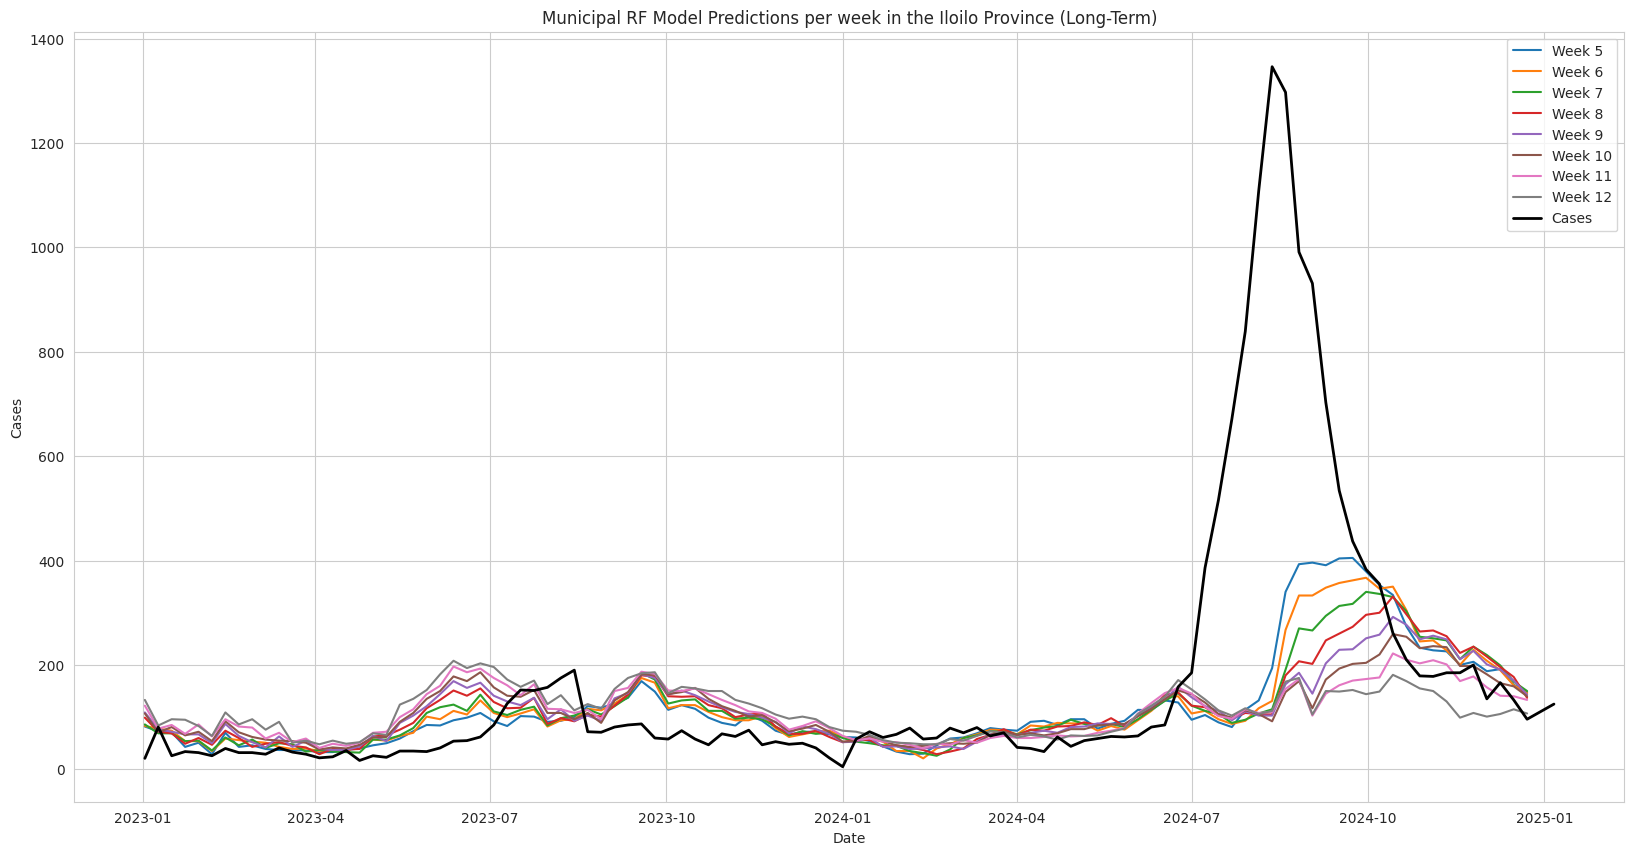

In [9]:
plt.figure(figsize=(20, 10))
n_weeks = range(5,13)
for i in n_weeks:
    plt.plot(sum_pred_mun_df[sum_pred_mun_df["Week"] == i]["Date"], sum_pred_mun_df[sum_pred_mun_df["Week"] == i]["predictions"], label=f"Week {i}")
#show actual
plt.plot(summed_df[summed_df["Date"].dt.year >= 2023]["Date"], summed_df[summed_df["Date"].dt.year >=2023]["Cases"], label="Cases", color = "black", linewidth=2)
plt.title("Municipal RF Model Predictions per week in the Iloilo Province (Long-Term)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

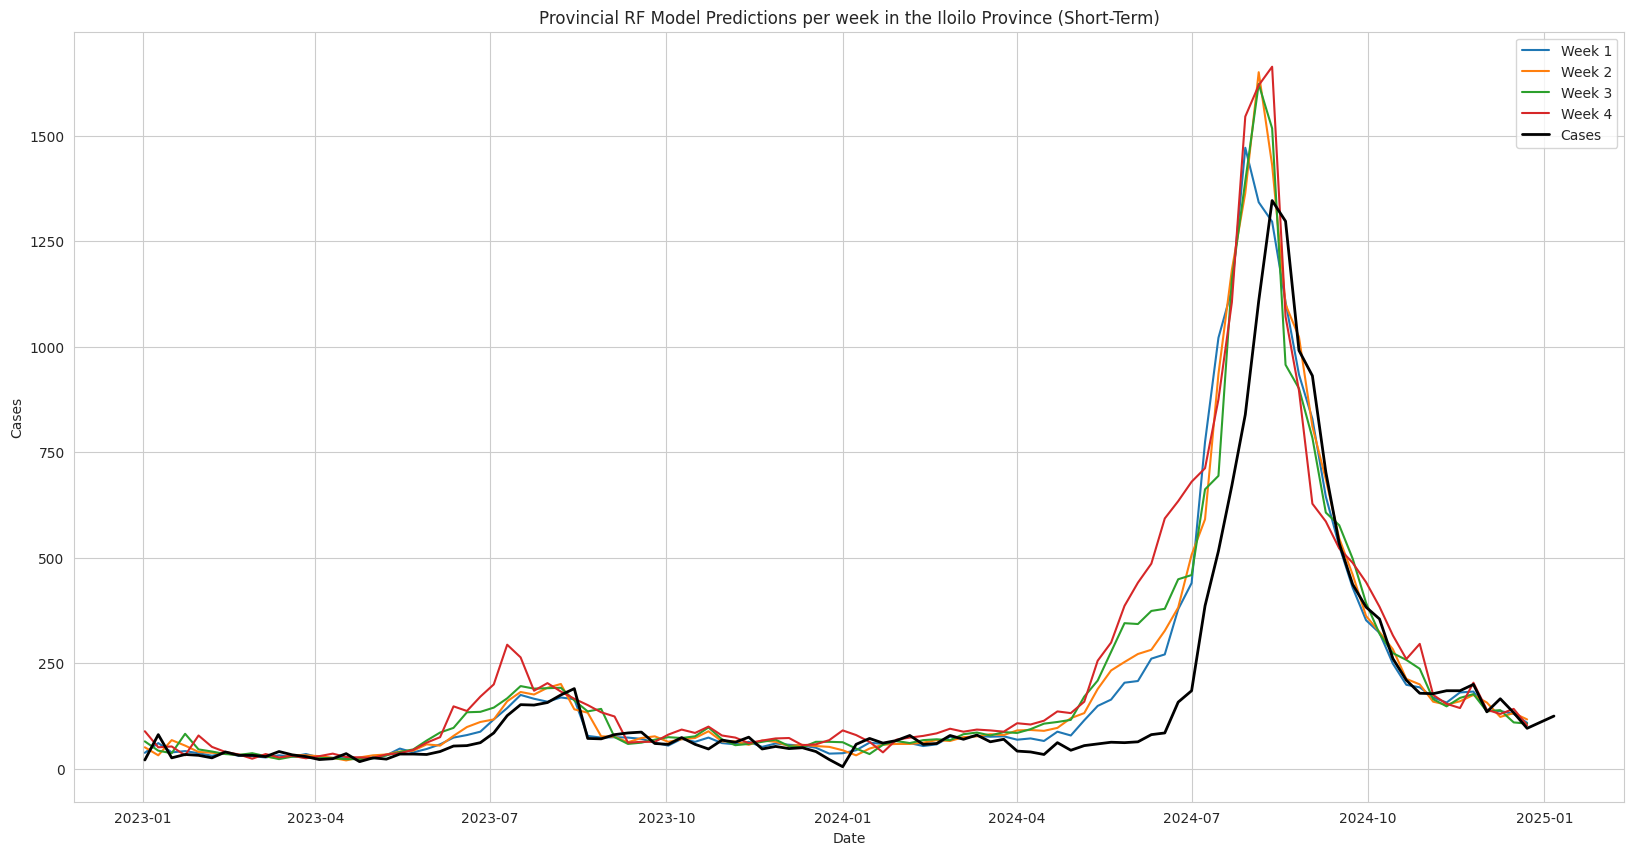

In [17]:
# plot the predictions for Provincial Model
plt.figure(figsize=(20, 10))
n_weeks = [1,2,3,4]
for i in n_weeks:
    plt.plot(sum_pred_pooled_df[sum_pred_pooled_df["Week"] == i]["Date"], sum_pred_pooled_df[sum_pred_pooled_df["Week"] == i]["predictions"], label=f"Week {i}")
#show actual
plt.plot(summed_df[summed_df["Date"].dt.year >= 2023]["Date"], summed_df[summed_df["Date"].dt.year >=2023]["Cases"], label="Cases", color = "black", linewidth=2)
plt.title("Provincial RF Model Predictions per week in the Iloilo Province (Short-Term)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

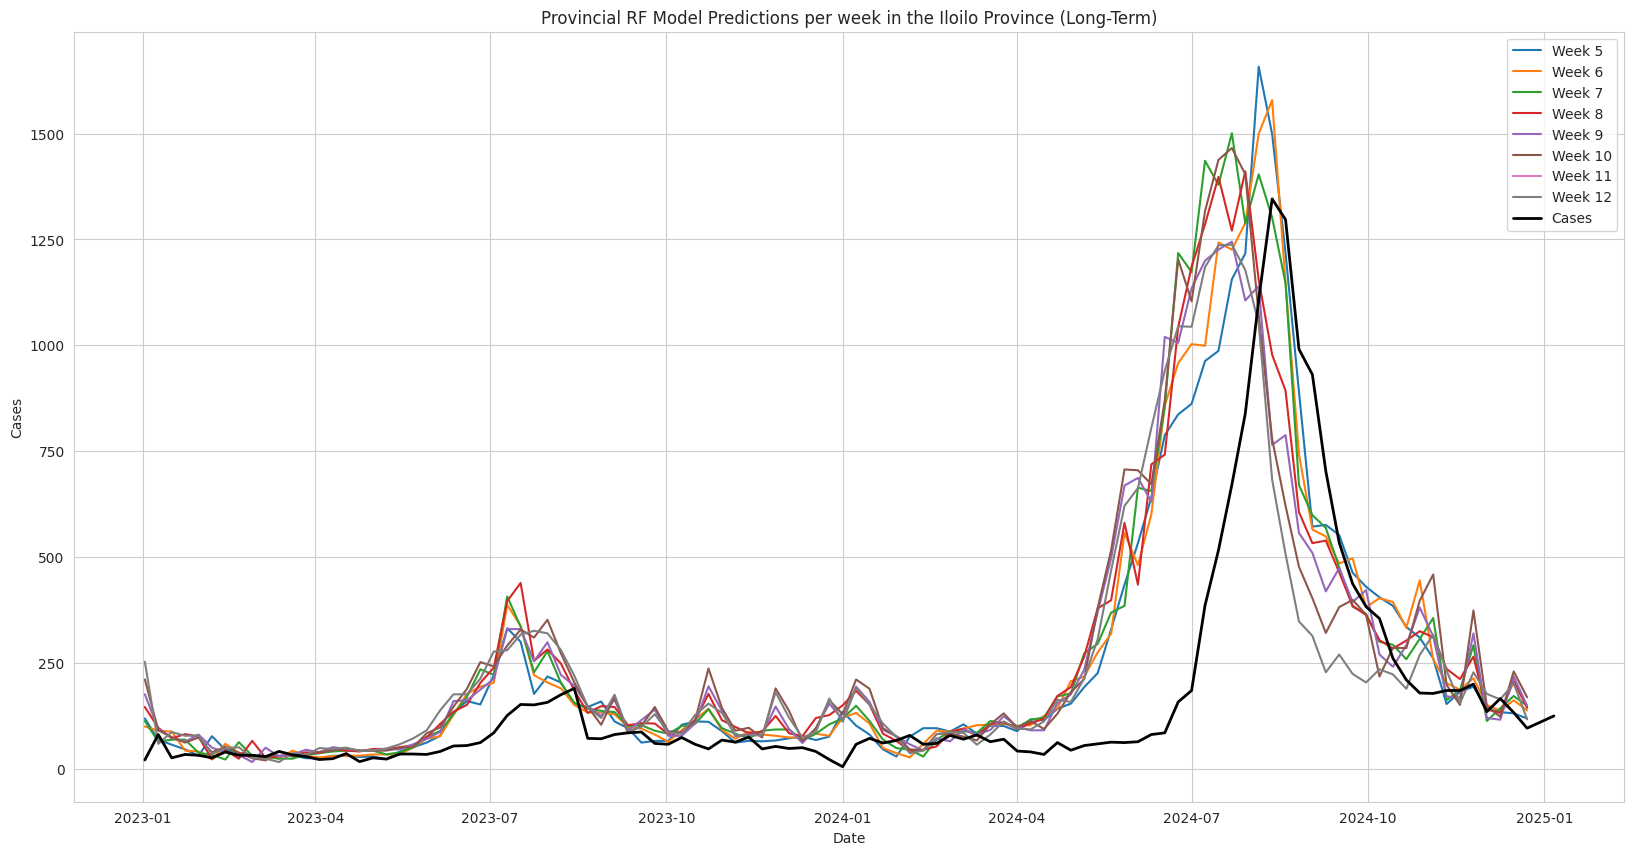

In [18]:
plt.figure(figsize=(20, 10))
n_weeks = range(5,13)
for i in n_weeks:
    plt.plot(sum_pred_pooled_df[sum_pred_pooled_df["Week"] == i]["Date"], sum_pred_pooled_df[sum_pred_pooled_df["Week"] == i]["predictions"], label=f"Week {i}")
#show actual
plt.plot(summed_df[summed_df["Date"].dt.year >= 2023]["Date"], summed_df[summed_df["Date"].dt.year >=2023]["Cases"], label="Cases", color = "black", linewidth=2)
plt.title("Provincial RF Model Predictions per week in the Iloilo Province (Long-Term)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()